In [141]:
import os 
from glob import glob

import torch 
from monai.transforms import (
    Compose,
    LoadImaged,
    ToTensord,
    AddChanneld,
    Spacingd,
    ScaleIntensityRanged,
    CropForegroundd,
)

from monai.data import Dataset, DataLoader
from monai.utils import first
import matplotlib.pyplot as plt

In [101]:
data_dir = '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour'

In [102]:
# 이미지와 레이블 이름 맞춰서 데이터 정리

train_images = sorted(glob(os.path.join(data_dir, 'TrainData', '*.nii.gz')))
train_labels = sorted(glob(os.path.join(data_dir, 'TrainLabels', '*.nii.gz')))

val_images = sorted(glob(os.path.join(data_dir, 'ValData', '*.nii.gz')))
val_labels = sorted(glob(os.path.join(data_dir, 'ValLabels', '*.nii.gz')))

train_files = [{"image" :image_name, 'label': label_name} for image_name, label_name in zip(train_images, train_labels)]
val_files = [{"image" :image_name, 'label': label_name} for image_name, label_name in zip(val_images, val_labels)]

In [103]:
import nibabel as nib

def check_label_dimensions(label_paths):
    for label_path in label_paths:
        label_img = nib.load(label_path)
        print(f"Label {label_path} has dimensions: {label_img.shape}")

print("Train Labels Dimensions:")
check_label_dimensions(train_labels)

print("\nValidation Labels Dimensions:")
check_label_dimensions(val_labels)

Train Labels Dimensions:
Label /home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_001.nii.gz has dimensions: (240, 240, 155)
Label /home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_002.nii.gz has dimensions: (240, 240, 155)
Label /home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_003.nii.gz has dimensions: (240, 240, 155)
Label /home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_004.nii.gz has dimensions: (240, 240, 155)
Label /home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_005.nii.gz has dimensions: (240, 240, 155)
Label /home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_006.nii.gz has dimensions: (240, 240, 155)
Label /home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_007.nii.gz has dimensions: (240, 240, 155)
Label /home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/Trai

## 가져온 데이터가 4D 이므로 3D으로 변환


* 이슈 : 원본 레이블은 이미 3D인데 한 번 더 줄여서 2d가 됌....

In [104]:
import os
from glob import glob
import nibabel as nib

def convert_image_4d_to_3d(image_path, channel=0):
    """
    Convert a 4D image to 3D by selecting a specific channel.
    
    Args:
        image_path (str): Path to the 4D image.
        channel (int): The channel to select for the 3D image.
        
    Returns:
        str: Path to the saved 3D image.
    """
    # Load the 4D image
    img = nib.load(image_path)
    data = img.get_fdata()
    
    # Select the desired channel
    data_3d = data[..., channel]
    
    # Create a new NIfTI image with the 3D data
    img_3d = nib.Nifti1Image(data_3d, img.affine)
    
    # Save the 3D image
    new_image_path = os.path.splitext(image_path)[0] + "_3d.nii.gz"
    nib.save(img_3d, new_image_path)
    
    return new_image_path

data_dir = '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour'

# Check if the directories exist
for subdir in ['TrainData', 'TrainLabels', 'ValData', 'ValLabels']:
    if not os.path.exists(os.path.join(data_dir, subdir)):
        print(f"Directory {subdir} does not exist!")

# Get the list of 4D images and labels
train_images = sorted(glob(os.path.join(data_dir, 'TrainData', '*.nii.gz')))
train_labels = sorted(glob(os.path.join(data_dir, 'TrainLabels', '*.nii.gz')))
val_images = sorted(glob(os.path.join(data_dir, 'ValData', '*.nii.gz')))
val_labels = sorted(glob(os.path.join(data_dir, 'ValLabels', '*.nii.gz')))

# Convert 4D images to 3D
train_images_3d = [convert_image_4d_to_3d(img) for img in train_images]
val_images_3d = [convert_image_4d_to_3d(img) for img in val_images]

# Use original labels
train_labels_3d = train_labels
val_labels_3d = val_labels

# Pair the 3D images and labels
train_files = [{"image": image_name, 'label': label_name} for image_name, label_name in zip(train_images_3d, train_labels_3d)]
val_files = [{"image": image_name, 'label': label_name} for image_name, label_name in zip(val_images_3d, val_labels_3d)]

print(train_files)
print(val_files)


[{'image': '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainData/BRATS_001.nii_3d.nii.gz', 'label': '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_001.nii.gz'}, {'image': '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainData/BRATS_002.nii_3d.nii.gz', 'label': '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_002.nii.gz'}, {'image': '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainData/BRATS_003.nii_3d.nii.gz', 'label': '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_003.nii.gz'}, {'image': '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainData/BRATS_004.nii_3d.nii.gz', 'label': '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_004.nii.gz'}, {'image': '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainData/BRATS_005.nii_3d.nii.gz', 'label': '/home/minyoungxi/MINYOUNGXI/

In [105]:
train_labels_3d

['/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_001.nii.gz',
 '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_002.nii.gz',
 '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_003.nii.gz',
 '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_004.nii.gz',
 '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_005.nii.gz',
 '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_006.nii.gz',
 '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_007.nii.gz',
 '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_008.nii.gz',
 '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_009.nii.gz',
 '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainLabels/BRATS_010.nii.gz',
 '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task0

dim 필드의 각 요소는 다음을 나타냅니다:

dim[0]: 이미지의 차원 수. 예를 들어, 3은 3D 이미지, 4는 4D 이미지를 나타냅니다.
dim[1]: 첫 번째 차원 (일반적으로 x 축)의 크기.
dim[2]: 두 번째 차원 (일반적으로 y 축)의 크기.
dim[3]: 세 번째 차원 (일반적으로 z 축)의 크기.
dim[4]: 네 번째 차원의 크기. 4D 이미지의 경우, 이는 시간, 채널 또는 다른 추가 차원을 나타낼 수 있습니다.
dim[5] ~ dim[7]: 추가 차원의 크기 (있는 경우). 대부분의 의료 영상에서는 이러한 추가 차원은 사용되지 않습니다.
제공된 dim 필드의 값 [4, 240, 240, 155, 4, 1, 1, 1]을 기반으로:

이미지는 4D입니다.
첫 번째 차원 (x 축)의 크기는 240입니다.
두 번째 차원 (y 축)의 크기는 240입니다.
세 번째 차원 (z 축)의 크기는 155입니다.
네 번째 차원의 크기는 4입니다. 이는 시간, 채널 또는 다른 추가 정보를 나타낼 수 있습니다.
따라서, 이미지는 240x240x155의 크기를 가지며, 네 번째 차원에는 4개의 값 또는 프레임이 있습니다.




User
이미지와 레이블 이름 맞춰서 데이터 정리

train_images = sorted(glob(os.path.join(data_dir, 'TrainData', '*.nii.gz')))
train_labels = sorted(glob(os.path.join(data_dir, 'TrainLabels', '*.nii.gz')))

val_images = sorted(glob(os.path.join(data_dir, 'ValData', '*.nii.gz')))
val_labels = sorted(glob(os.path.join(data_dir, 'ValLabels', '*.nii.gz')))

train_files = [{"image" :image_name, 'label': label_name} for image_name, label_name in zip(train_images, train_labels)]
val_files = [{"image" :image_name, 'label': label_name} for image_name, label_name in zip(val_images, val_labels)] 여기 코드에서 모든 데이터를 3차원 데이터로 변경하는 코드를 알려줘
3D 데이터로 변환하려면 각 4D 이미지에서 특정 시간 또는 채널 차원을 선택해야 합니다. 예를 들어, 4D 이미지의 첫 번째 시간 또는 채널만을 선택하여 3D 이미지로 변환할 수 있습니다.

이를 위해 nibabel 라이브러리를 사용하여 4D 이미지를 로드하고, 원하는 차원을 선택

In [106]:
import nibabel as nib

image_path = '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour/TrainData/BRATS_300.nii_3d.nii.gz'
img = nib.load(image_path)
print(img.header["pixdim"])

[1. 1. 1. 1. 1. 1. 1. 1.]


In [145]:
# load the images 
# do any transforms 
# need to convert them into torch tensors 

origin_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        ToTensord(keys=['image', 'label'])
    ]
    
)

train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        Spacingd(keys=['image','label'], pixdim=(1.5,1.5,2)),
        ScaleIntensityRanged(keys='image', a_min=200, a_max=200, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=['image', 'label'], source_key = 'image'),
        ToTensord(keys=['image', 'label'])
    ]
)

val_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        Spacingd(keys=['image','label'], pixdim=(1.5,1.5,2)),
        ScaleIntensityRanged(keys='image', a_min=200, a_max=200, b_min=0.0, b_max=1.0, clip=True),
        ToTensord(keys=['image', 'label'])
    ]
    
)

In [146]:
origin_ds = Dataset(data=train_files, transform=origin_transforms)
origin_loader = DataLoader(origin_ds, batch_size=1)

train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

val_ds = Dataset(data=val_files, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=1)


In [147]:
train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1, shuffle=True)

# Check the first batch
batch = next(iter(train_loader))
print(batch['image'].shape, batch['label'].shape)

torch.Size([1, 1, 89, 118, 71]) torch.Size([1, 1, 89, 118, 71])


/home/minyoungxi/anaconda3/envs/TorchEnv/lib/python3.8/site-packages/monai/transforms/intensity/array.py:785: Warning: Divide by zero (a_min == a_max)
  warn("Divide by zero (a_min == a_max)", Warning)


first 함수는 주어진 iterable에서 첫 번째 항목을 반환하거나, iterable이 비어 있을 경우 default 값을 반환합니다. 이 함수는 주로 'for' 표현식과 함께 의미가 있습니다.

In [148]:
test_patient = first(train_loader)

origin_patient = first(origin_loader)

In [149]:
print(torch.min(test_patient['image']))

print(torch.max(test_patient['image']))

metatensor(-200.)
metatensor(1294.)


findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font famil

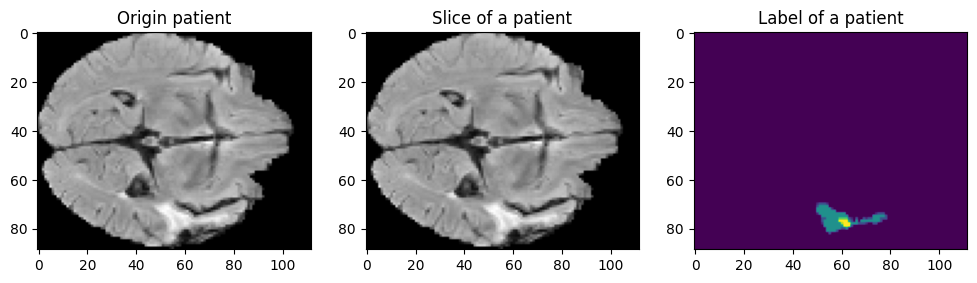

In [150]:
plt.figure('test', (12,6))

plt.subplot(1, 3, 1)
plt.title('Origin patient')
plt.imshow(test_patient['image'][0,0, :, :, 30], cmap="gray")


plt.subplot(1, 3, 2)
plt.title('Slice of a patient')
plt.imshow(test_patient['image'][0,0, :, :, 30], cmap="gray")

plt.subplot(1,3,3)
plt.title('Label of a patient')
plt.imshow(test_patient['label'][0,0, :, :, 30])

plt.show()